# Data Cleaning

## Introduction
In this section we will go through the data analytics process of Data Cleaning.

To skip directly to to particular parts, use the following links:
1. **[Libraries / Reading Data](#libraries_reading-data)**
2. **[Discovering Data](#discovering)**
3. **[Structuring Data](#structuring)**
4. **[Handle Missing Data](#handle_missing)**
5. **[Handle Duplicates](#handle_duplicates)**
6. **[Handle Outliers](#handle_outliers)**
7. **[Save The Cleaned Dataframe](#saving_df)**



<a id="libraries_reading-data"></a>
## 1. Libraries / Reading Data

In [327]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [328]:
df = pd.read_csv("../../data/raw_data.csv")

<a id="discovering"></a>
## 2. Discovering Data

In [329]:
df.head(10)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
5,6,104000,Technology,Bill Gates,67.0,United States,Medina,Microsoft,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
6,7,94500,Media & Entertainment,Michael Bloomberg,81.0,United States,New York,Bloomberg LP,Media & Entertainment,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
7,8,93000,Telecom,Carlos Slim Helu & family,83.0,Mexico,Mexico City,Telecom,Telecom,Mexico,...,3.6,"$1,258,286,717,125",40.2,105.8,75.0,13.1,55.1,1.260140e+08,23.634501,-102.552784
8,9,83400,Diversified,Mukesh Ambani,65.0,India,Mumbai,Diversified,Diversified,India,...,7.7,"$2,611,000,000,000",28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880
9,10,80700,Technology,Steve Ballmer,67.0,United States,Hunts Point,Microsoft,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891


In [330]:
df.shape

(2640, 35)

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [332]:
df.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


<a id="structuring"></a>
## 3. Structuring Data

In [333]:
# Keep column identifiers consistent
df = df.rename(
    columns={
        'finalWorth': 'final_worth_usd',
        'personName': 'person_name', 'countryOfCitizenship': 'country_of_citizenship', 'selfMade': 'wealth_source',
        'birthDate': 'birth_date',
        'lastName': 'last_name',
        'firstName': 'first_name',
        'residenceStateRegion': 'residence_state_region', 'birthYear': 'birth_year',
        'birthMonth': 'birth_month',
        'birthDay': 'birth_day',
        'gdp_country': 'gdp_country_usd',
        'gross_tertiary_education_enrollment': 'gross_tertiary_education_enrollment_country'
        , 'tax_revenue_country_country': 'tax_revenue_country_usd'
    }
)

In [334]:
# Check datatypes for date-columns
print(type(df['birth_date'][0]))
print(type(df['date'][0]))

<class 'str'>
<class 'str'>


In [335]:
# Convert str datatype to datetime object and validate the updated datatype
df['birth_date'] = pd.to_datetime(df['birth_date'])
df['date'] = pd.to_datetime(df['date'])
print(type(df['birth_date'][0]))
print(type(df['date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [336]:
# Dict for replacing bool values in the 'wealth_source' column for better clarity
replace_dict = {
    True: 'Self-Made',
    False: 'Inherited/Unearned'
}
df['wealth_source'] = df['wealth_source'].replace(replace_dict)

In [337]:
# Convert 'gdp_country_in_dollars' from str to numeric after removing '$' and commas
df['gdp_country_usd'] = pd.to_numeric(
    df['gdp_country_usd'].str.strip('$ ').
    str.replace(',', '')
)

In [338]:
# Select only relevant features for the specific data analysis project
filtered_df = df[[
    'rank', 'final_worth_usd', 'person_name', 'organization', 'title', 'residence_state_region', 'state',
    'age', 'country', 'country_of_citizenship', 'city', 'industries', 'wealth_source', 'gender',
    'life_expectancy_country', 'gross_tertiary_education_enrollment_country',
    'gross_primary_education_enrollment_country', 'gdp_country_usd', 'total_tax_rate_country', 'population_country'
]]

**Convert and Format 'final_worth_usd':** Multiply the 'final_worth_usd' column by 1,000,000 to adapt the unit and create a new column, 'final_worth_usd_formatted,' which represents the values in billions for better readability.


In [339]:
# Before adapting the unit
print(filtered_df['final_worth_usd'][6])

94500


In [340]:
filtered_df['final_worth_usd'] = filtered_df['final_worth_usd'].mul(1000000)
filtered_df['final_worth_usd_formatted'] = (filtered_df['final_worth_usd']
                                            .div(1000000000)
                                            .round(1)
                                            .astype(str) + 'B')

In [341]:
# After converting + formatting
print(filtered_df['final_worth_usd'][6])
print(filtered_df['final_worth_usd_formatted'][6])

94500000000
94.5B


<a id="handle_missing"></a>
## 4. Handle missing data

##### Checking for Zero Values
Before proceeding with handling missing data, it's crucial to check for zero values, as they could potentially indicate missing or undefined data.

In [342]:
# Check for zero values in the dataframe
(df == 0).sum()

rank                                           0
final_worth_usd                                0
category                                       0
person_name                                    0
age                                            0
country                                        0
city                                           0
source                                         0
industries                                     0
country_of_citizenship                         0
organization                                   0
wealth_source                                  0
status                                         0
gender                                         0
birth_date                                     0
last_name                                      0
first_name                                     0
title                                          0
date                                           0
state                                          0
residence_state_regi

If there are numeric columns with a substantial number of zeros, it's essential to investigate whether these zeros represent genuine data or if they are indicative of missing information. In the latter case, it's advisable to replace these zeros with NaN values to ensure consistent handling of missing data in subsequent steps.
For example:
```python
df = df.replace(0, np.nan)

This step ensures a thorough examination of zero values and provides a standardized approach for addressing potential missing data. Once this is done, you can proceed with the subsequent steps of handling missing values in your dataset.

In [343]:
# Function to get an overview of the missing data per column
def get_missing_data_rate(input_df: pd.DataFrame):
    total = input_df.isna().sum().sort_values(ascending=False)
    percent = (input_df.isna().sum() / input_df.isna().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Missing Data Total', 'Missing Data Percent'])
    return missing_data

In [344]:
get_missing_data_rate(df)

,Missing Data Total,Missing Data Percent
organization,2315,0.876894
title,2301,0.871591
residence_state_region,1893,0.717045
state,1887,0.714773
cpi_change_country,184,0.069697
cpi_country,184,0.069697
tax_revenue_country_usd,183,0.069318
total_tax_rate_country,182,0.068939
life_expectancy_country,182,0.068939
gross_tertiary_education_enrollment_country,182,0.068939


##### Drop columns when more than 15 % of the data is missing

In [345]:
filtered_df = filtered_df.drop(columns=['title', 'organization', 'residence_state_region', 'state'])

In [346]:
get_missing_data_rate(filtered_df)

,Missing Data Total,Missing Data Percent
life_expectancy_country,182,0.068939
total_tax_rate_country,182,0.068939
gross_tertiary_education_enrollment_country,182,0.068939
gross_primary_education_enrollment_country,181,0.068561
population_country,164,0.062121
gdp_country_usd,164,0.062121
city,72,0.027273
age,65,0.024621
country,38,0.014394
rank,0,0.000000


##### Handling Remaining Missing Data

When dealing with remaining missing data in your dataset, several options are available:

1. **Drop Rows:**
   - You can choose to drop the remaining rows with missing data. This is a straightforward approach but might result in a loss of information.

2. **Fill NaN Entries for Categorical Columns:**
   - For categorical columns, consider filling NaN entries with the mode (the most frequent value) to retain information without significant data loss.

3. **Fill NaN Entries for Numerical Columns:**
   - For numerical columns, filling NaN entries with the mean or median of the specific column is an option. Use the mean if the data is not skewed and does not contain outliers. If skewness or outliers are present, the median is a more robust fill option.

4. **Consideration for Outliers:**
   - It's important to be mindful of outliers in the data. If your dataset contains skewed data or outliers, favor using the median as the NaN-fill option to avoid the influence of extreme values.

5. **Avoid Biased Data:**
   - To ensure the integrity of your analysis and avoid biased results, consider dropping the remaining rows with missing data. This helps maintain the overall quality and fairness of your dataset.

Choose the appropriate strategy based on the nature and characteristics of your data, taking into account the potential impact on the analysis and results.


In [347]:
# Check rows with missing data
filtered_df[filtered_df.isna().any(axis=1)]

,rank,final_worth_usd,person_name,age,country,country_of_citizenship,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country,final_worth_usd_formatted
32,33,38000000000,Li Ka-shing,94.0,Hong Kong,Hong Kong,NaN,Diversified,Self-Made,M,NaN,NaN,NaN,NaN,NaN,NaN,38.0B
46,47,29500000000,Lee Shau Kee,95.0,Hong Kong,Hong Kong,Hong Kong,Real Estate,Self-Made,M,NaN,NaN,NaN,NaN,NaN,NaN,29.5B
85,86,18900000000,Eyal Ofer,72.0,Monaco,Israel,Monte Carlo,Diversified,Inherited/Unearned,M,NaN,NaN,NaN,7.184844e+09,NaN,38964.0,18.9B
107,108,15800000000,Karl Albrecht Jr. & family,NaN,Germany,Germany,NaN,Fashion & Retail,Inherited/Unearned,M,80.9,70.2,104.0,3.845630e+12,48.8,83132799.0,15.8B
108,108,15800000000,Beate Heister,NaN,NaN,Germany,NaN,Fashion & Retail,Inherited/Unearned,F,NaN,NaN,NaN,NaN,NaN,NaN,15.8B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,2540,1000000000,Réal Plourde,NaN,Canada,Canada,Westmount,Fashion & Retail,Self-Made,M,81.9,68.9,100.9,1.736426e+12,24.5,36991981.0,1.0B
2610,2540,1000000000,Vera Rechulski Santo Domingo,74.0,Bermuda,Brazil,NaN,Food & Beverage,Inherited/Unearned,F,NaN,NaN,NaN,NaN,NaN,NaN,1.0B
2626,2540,1000000000,Masaru Wasami,77.0,NaN,Japan,NaN,Logistics,Self-Made,M,NaN,NaN,NaN,NaN,NaN,NaN,1.0B
2629,2540,1000000000,Toto Wolff,51.0,Monaco,Austria,NaN,Sports,Self-Made,M,NaN,NaN,NaN,7.184844e+09,NaN,38964.0,1.0B


In [348]:
filtered_df.isna().sum().max()

182

In [349]:
# Drop remaining NaN-Enry rows
filtered_df = filtered_df.dropna(axis=0)

In [350]:
# Validate that there's no missing data left
filtered_df.isna().sum().max()

0

<a id="handle_duplicates"></a>
## 5. Handle Duplicates

Duplicate entries in a dataset can introduce inconsistencies and skew analysis results.
You begin by identifying and detecting duplicate rows in your dataset. 

In [351]:
# Check for exact duplicated rows in the df
filtered_df.loc[filtered_df.duplicated()]

,rank,final_worth_usd,person_name,age,country,country_of_citizenship,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country,final_worth_usd_formatted


In [352]:
# Check for feature-specific duplicated rows based on 'person_name' and 'country'
filtered_df.loc[filtered_df.duplicated(subset=['person_name', 'country'])]

,rank,final_worth_usd,person_name,age,country,country_of_citizenship,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country,final_worth_usd_formatted
2112,2020,1400000000,Wang Yanqing & family,76.0,China,China,Weihai,Manufacturing,Inherited/Unearned,F,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09,1.4B
2317,2259,1200000000,Li Li,59.0,China,China,Shenzhen,Healthcare,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09,1.2B


In [353]:
# Investigate feature-specific duplicates for 'person_name'
filtered_df.query('person_name == "Li Li" or person_name.str.startswith("Wang Yanqing")')

,rank,final_worth_usd,person_name,age,country,country_of_citizenship,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country,final_worth_usd_formatted
785,766,3700000000,Wang Yanqing & family,56.0,China,China,Wuxi,Manufacturing,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09,3.7B
1045,1027,2900000000,Li Li,57.0,China,China,Changsha,Healthcare,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09,2.9B
2112,2020,1400000000,Wang Yanqing & family,76.0,China,China,Weihai,Manufacturing,Inherited/Unearned,F,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09,1.4B
2317,2259,1200000000,Li Li,59.0,China,China,Shenzhen,Healthcare,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09,1.2B


After identifying duplicate rows, the next steps involve deciding whether to drop or maintain them, considering the potential consequences of data loss. In this case, it's observed that for 'Wang Yanqing & family' and 'Li Li,' there are entries with slight differences in gender and age, suggesting they might not belong to the same person.

To demonstrate how to drop potentially feature-specific duplicated rows, the following code can be used:

In [354]:
# Drop potentially feature-specific duplicated rows
filtered_df_no_duplicates = filtered_df.loc[~filtered_df.duplicated(subset=['person_name', 'country'])] \
    .reset_index(drop=True).copy()

In [355]:
# Verify that dropping potentially duplicated rows worked properly
filtered_df_no_duplicates.query('person_name == "Li Li" or person_name.str.startswith("Wang Yanqing")')

,rank,final_worth_usd,person_name,age,country,country_of_citizenship,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country,final_worth_usd_formatted
731,766,3700000000,Wang Yanqing & family,56.0,China,China,Wuxi,Manufacturing,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09,3.7B
971,1027,2900000000,Li Li,57.0,China,China,Changsha,Healthcare,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09,2.9B


<a id="handle_outliers"></a>
## 6. Handle outliers

Usually you can check for outliers through a boxplot related to the specific numerical (x) and a dependent categorical (y) feature;
But this type of dataset is very susceptible to outliers because of the wide range of billionaires' wealth 

In [356]:
# Define a function for boxplot creation for better reusability
def create_box_plot(df, title, show_fliers):
    plt.figure(figsize=(14, 6))
    boxplot = sns.boxplot(data=df, x='final_worth_usd', y='industries', showfliers=show_fliers)
    boxplot.set(xlabel='Final Worth ($)', ylabel='Industry')
    # Format the x-axis tick labels
    formatted_labels = [f"{value / 1e9:.1f}B" for value in boxplot.get_xticks()]
    boxplot.set_xticklabels(formatted_labels)
    plt.title(label=title, fontsize=18, fontweight='bold')
    plt.show()

In [357]:
title_outliers = "Final Worth Distribution by Industry - Outliers included"
title_no_outliers = "Final Worth Distribution by Industry - Outliers excluded"

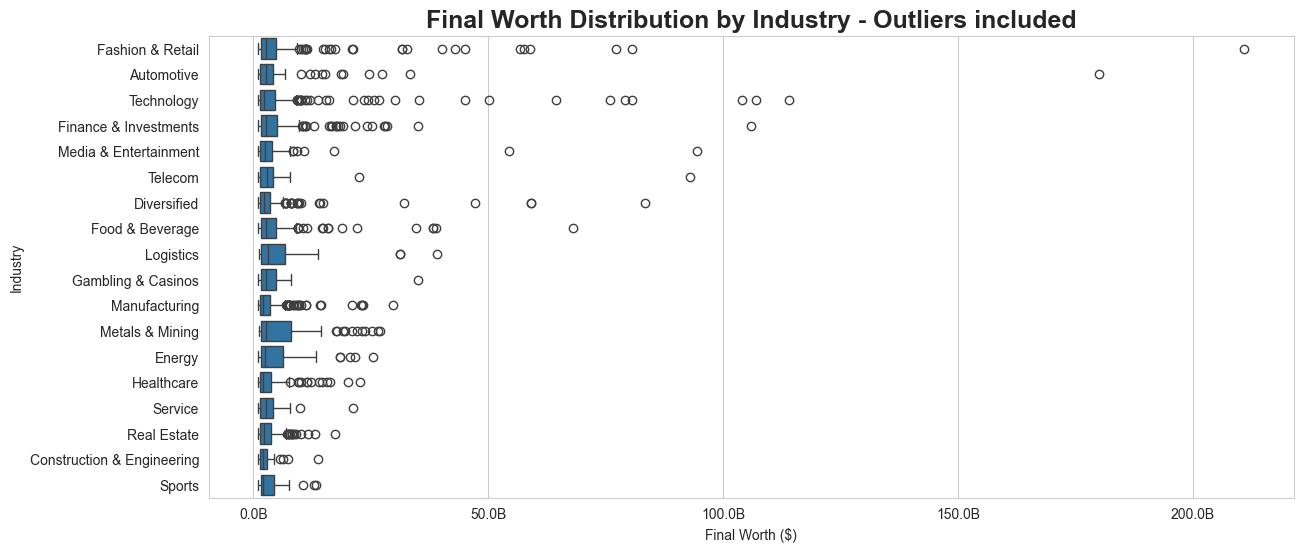

In [358]:
# Outliers included
create_box_plot(filtered_df, title_outliers, show_fliers=True)

##### To get a better view of the final worth distribution we exclude the outliers

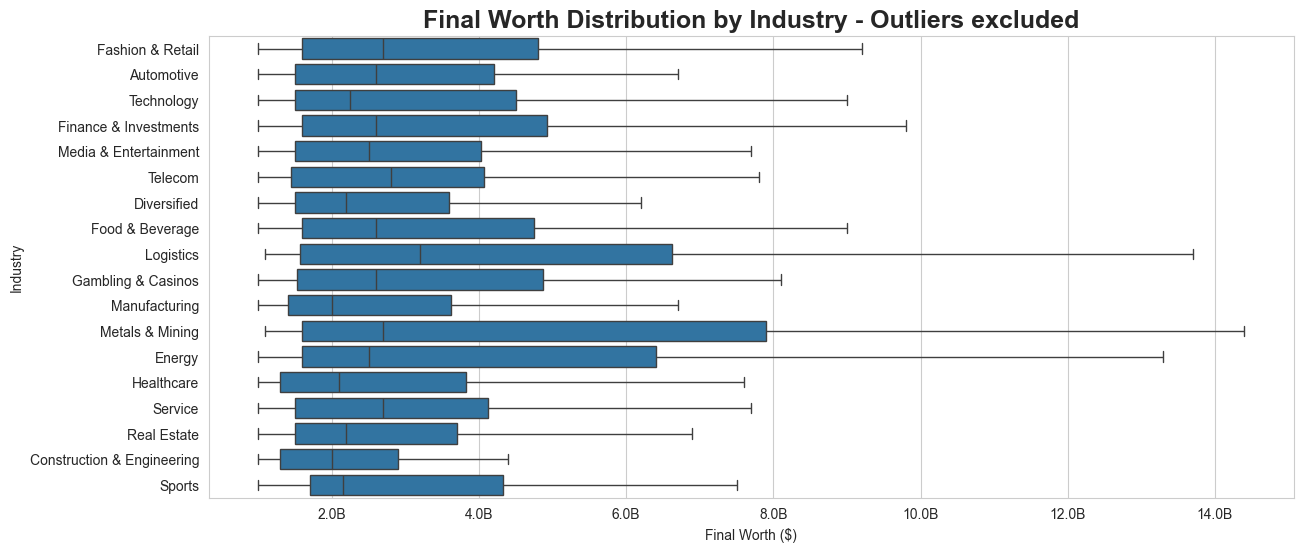

In [359]:
create_box_plot(filtered_df, title_no_outliers, show_fliers=False)

To demonstrate, how handling outliers could be done, you define a threshold that gets multiplied by the standard deviation of the related column (The higher the threshold, the stricter the filter criteria); Then you check if there are entries above this threshold, and drop them for instance. Otherwise, you could handle them just like mentioned above the missing data (replacing with column's median/mean). 

In [360]:
threshold = 3 * filtered_df['final_worth_usd'].std()
condition = (filtered_df['final_worth_usd'] > threshold)
# Use boolean indexing to select rows that don't match the condition
filtered_df_outliers_handled = filtered_df.loc[~condition]

It's important to mention that there is definitely not the one right way to handle outliers for every scenario. Its really project-specific and must be thought out. Outliers can also be very valuable data, where just dropping them could lead to biased data. 

In [361]:
# Check if there are any outliers left based on dropping-condition
filtered_df_outliers_handled.loc[condition]

,rank,final_worth_usd,person_name,age,country,country_of_citizenship,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country,final_worth_usd_formatted


As shown, the data is now less widely dispersed and there are way less outliers than before

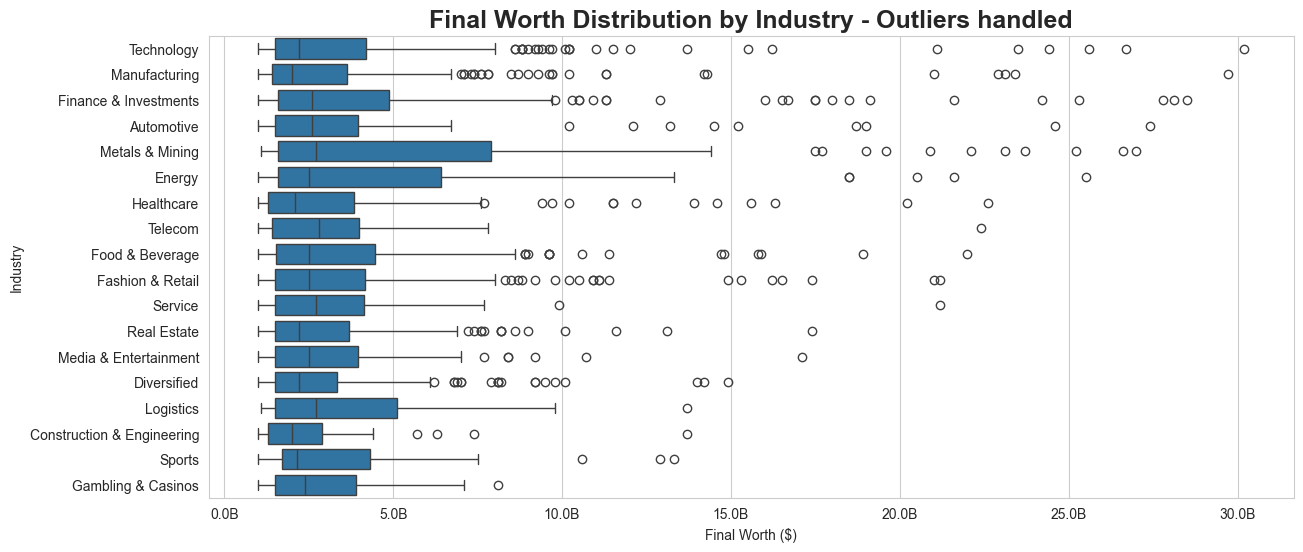

In [362]:
title_outliers_handled = "Final Worth Distribution by Industry - Outliers handled"
create_box_plot(filtered_df_outliers_handled, title_outliers_handled, show_fliers=True)

<a id="saving_df"></a>
## 7. Save The Cleaned Dataframe

For future EDA, you should use the original filtered df (without outlier handling), because outliers aren't systematic data errors here that could influence our analysis in a bad way; they are a valuable part of the overall df.

In [363]:
filtered_df.to_csv("../../data/cleaned_data.csv", index=False)

In [364]:
filtered_df_outliers_handled.to_csv("../../data/cleaned_data_outliers_handled.csv", index=False)